In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
Base = automap_base()

In [12]:
# reflect an existing database into a new model
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [14]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [21]:
first_row_m = session.query(measurement).first()
first_row_m.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b5e18456c8>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08}

In [23]:
first_row_s = session.query(station).first()
first_row_s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b5e1897948>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

# Exploratory Precipitation Analysis

## GRADER PLEASE NOTE

* Some of the instructions are different from the original but still adhere to the rubric.
* The students get the average precipitation per day instead of every single precipitation value.

In [35]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurment.date.desc()).first()
recent_date

('2017-08-23')

In [44]:
last_twelve_m = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_twelve_dm)

2016-08-23


In [67]:
# Using this date, find the average precipitation per day

sel = [func.avg(measurement.prcp)]
month_averages = session.query(measurement.date,*sel).\
    filter(measurement.date >= last_twelve_m).group_by(measurement.date).order_by(measurement.date).all()
month_averages

[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

In [68]:
# Convert your results into a pandas DataFrame with date as index.
prec_df =pd.DataFrame(month_averages,columns = ["Date","Avg_precipitation"])
prec_df.set_index("Date")

,Avg_precipitation
Date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


<Figure size 432x288 with 0 Axes>

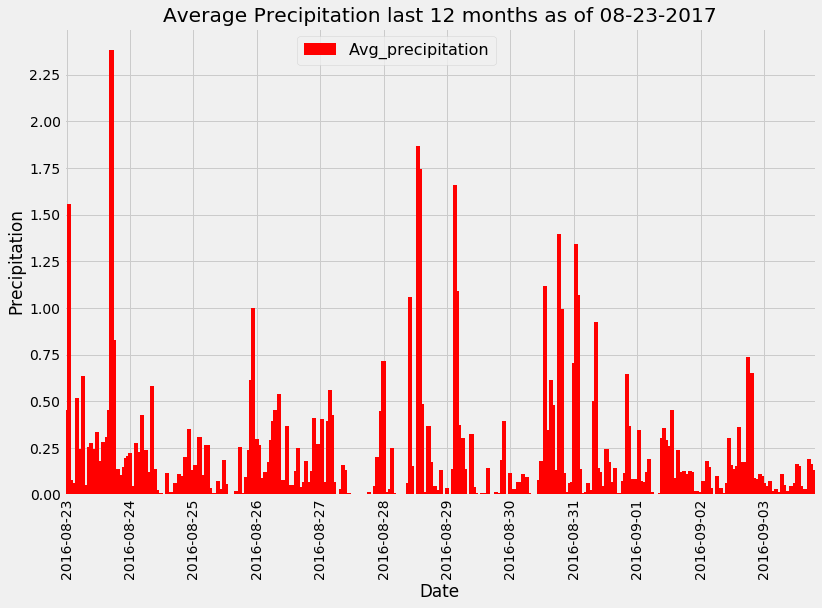

<Figure size 432x288 with 0 Axes>

In [76]:
# Use Pandas Plotting with Matplotlib to plot the data

fig = plt.figure()
ax = prec_df.plot.bar(x='Date', y='Avg_precipitation', width = 2 ,figsize=(12,8), color='r')
plt.locator_params(nbins=12)
plt.ylabel("Precipitation")
ax.set_title('Average Precipitation last 12 months as of 08-23-2017')
plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.show()
plt.savefig("Images/Avg Precipitation.png")

In [77]:
# Use Pandas to calculate the summary statistics for the precipitation data
prec_df.describe()

,Avg_precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [89]:
# Query total number of stations in dataset
total_stations = session.query(measurement.station).all()
total_stations 

[('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC0051

In [92]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
total_count = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
total_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [97]:
highest_count = total_count[0][0]
highest_count

'USC00519281'

In [102]:
# Using the station id from the previous query, calculate the lowest, 
# highest, and average temperature recorded for this station.
sel = [func.avg(measurement.tobs), 
       func.min(measurement.tobs), 
       func.max(measurement.tobs)]
station_prec = session.query(*sel).filter(measurement.station==highest_count).all()
station_prec


[(71.66378066378067, 54.0, 85.0)]

In [105]:
sel_1= [func.avg(measurement.tobs)]
t_averages = session.query(measurement.date,*sel_1).\
    filter(measurement.date >= last_twelve_m).group_by(measurement.date).order_by(measurement.date).all()
t_averages

[('2016-08-23', 78.28571428571429),
 ('2016-08-24', 77.57142857142857),
 ('2016-08-25', 79.42857142857143),
 ('2016-08-26', 80.5),
 ('2016-08-27', 76.83333333333333),
 ('2016-08-28', 76.0),
 ('2016-08-29', 78.71428571428571),
 ('2016-08-30', 77.33333333333333),
 ('2016-08-31', 78.28571428571429),
 ('2016-09-01', 80.16666666666667),
 ('2016-09-02', 79.42857142857143),
 ('2016-09-03', 77.4),
 ('2016-09-04', 77.0),
 ('2016-09-05', 79.5),
 ('2016-09-06', 75.66666666666667),
 ('2016-09-07', 75.83333333333333),
 ('2016-09-08', 78.71428571428571),
 ('2016-09-09', 77.42857142857143),
 ('2016-09-10', 76.8),
 ('2016-09-11', 77.2),
 ('2016-09-12', 76.85714285714286),
 ('2016-09-13', 77.57142857142857),
 ('2016-09-14', 75.85714285714286),
 ('2016-09-15', 77.85714285714286),
 ('2016-09-16', 77.85714285714286),
 ('2016-09-17', 78.6),
 ('2016-09-18', 78.6),
 ('2016-09-19', 76.57142857142857),
 ('2016-09-20', 75.85714285714286),
 ('2016-09-21', 76.66666666666667),
 ('2016-09-22', 76.57142857142857),
 

In [107]:
t_df = pd.DataFrame(t_averages, columns =['Date','Temp'])
t_df

,Date,Temp
0,2016-08-23,78.285714
1,2016-08-24,77.571429
2,2016-08-25,79.428571
3,2016-08-26,80.500000
4,2016-08-27,76.833333
...,...,...
361,2017-08-19,78.750000
362,2017-08-20,79.666667
363,2017-08-21,79.500000
364,2017-08-22,80.000000


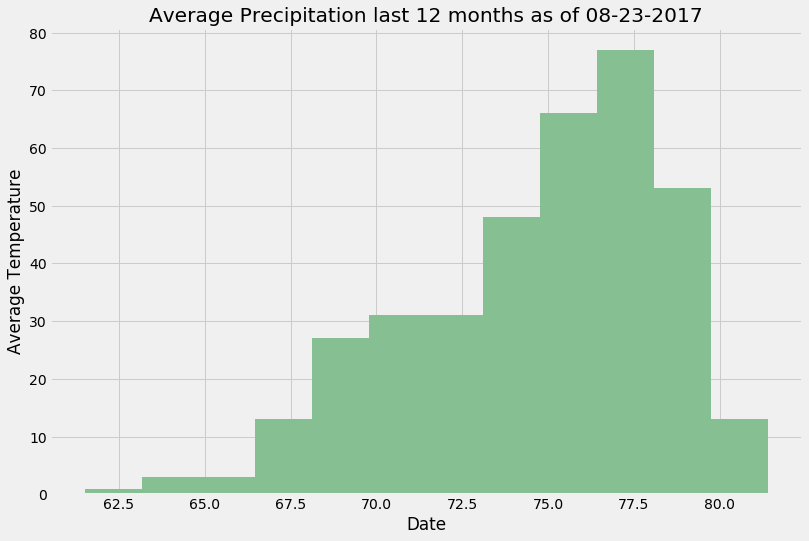

In [116]:
ax = t_df.hist(column='Temp', bins=12, grid=True, figsize=(12,8), color='#86bf91')
plt.title("Average Precipitation last 12 months as of 08-23-2017")
plt.ylabel("Average Temperature")
plt.xlabel('Date')
plt.savefig("Images/Average temp.png")

In [118]:
t_df.describe()

,Temp
count,366.000000
mean,74.683873
std,3.691003
min,61.500000
25%,72.285714
50%,75.500000
75%,77.571429
max,81.400000


# Close session

In [119]:
session.close()